In [10]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import utils.spike_utils as spike_utils
import utils.classifier_utils as classifier_utils
import utils.visualization_utils as visualization_utils

import os
import pandas as pd
import matplotlib


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
PRE_INTERVAL = 1300
POST_INTERVAL = 1500
INTERVAL_SIZE = 100
EVENT = "FeedbackOnset"

# output dir that was specified in the decode_features_with_pseudo.py
OUTPUT_DIR = "/data/patrick_scratch/pseudo"

SESSIONS_PATH = "/data/patrick_scratch/multi_sess/valid_sessions.pickle"


### Visualize decoder accuracy

Text(0, 0.5, 'Decoder Accuracy')

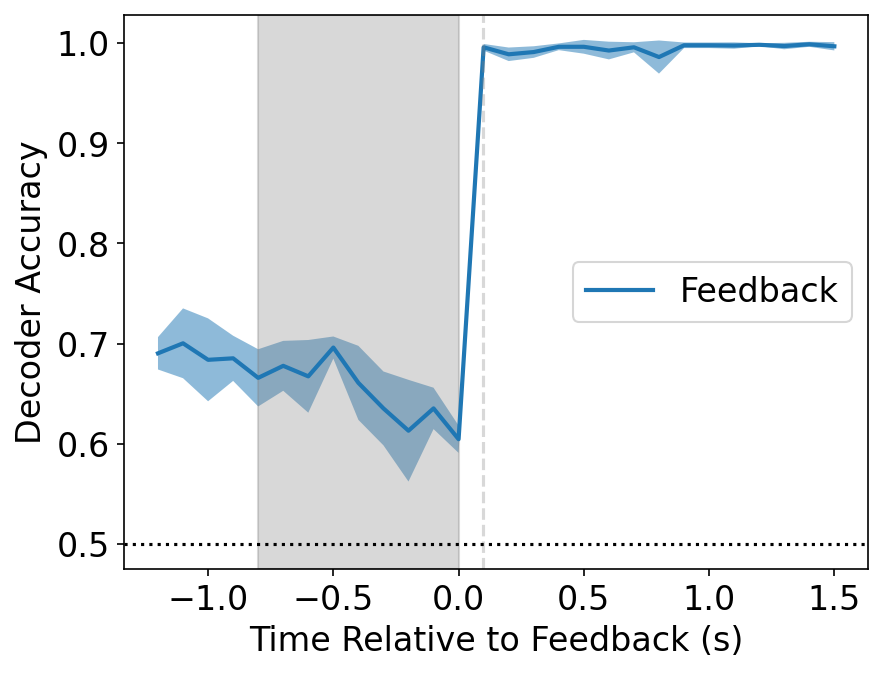

In [12]:
# load the test accuracy of generated from the decode_features_with_pseudo.py script
# here I'm just visualizing test accuracy, but can very well visualize train/shuffled as well. 
test_accs = np.load(os.path.join(OUTPUT_DIR, f"feedback_test_accs.npy"))
matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(dpi=150)
# plots the mean and standard deviation of decoding accuracy across splits, by time. 
visualization_utils.visualize_accuracy_across_time_bins(
    test_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"Feedback",
    right_align=True, 
)
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.5, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")

In [6]:
valid_sess = pd.read_pickle(SESSIONS_PATH)
positions = spike_utils.get_unit_positions(valid_sess)

In [7]:
# make some structures go down to level 2
USE_STRUCTURE_2 = ["diencephalon (di)", "metencephalon (met)", "telencephalon (tel)"]
def get_manual_structure(positions):
    manual_structure = []
    for i, row in positions.iterrows():
        if row.structure_level1 in USE_STRUCTURE_2:
            manual_structure.append(row.structure_level2)
        else: 
            manual_structure.append(row.structure_level1)
    positions["manual_structure"] = manual_structure
    return positions

positions = get_manual_structure(positions)

[ 470.5  486.5  615.5  783.5  859.5  941.5  943.5  944.5 1031.5 1077.5
 1079.5 1108.5]
14


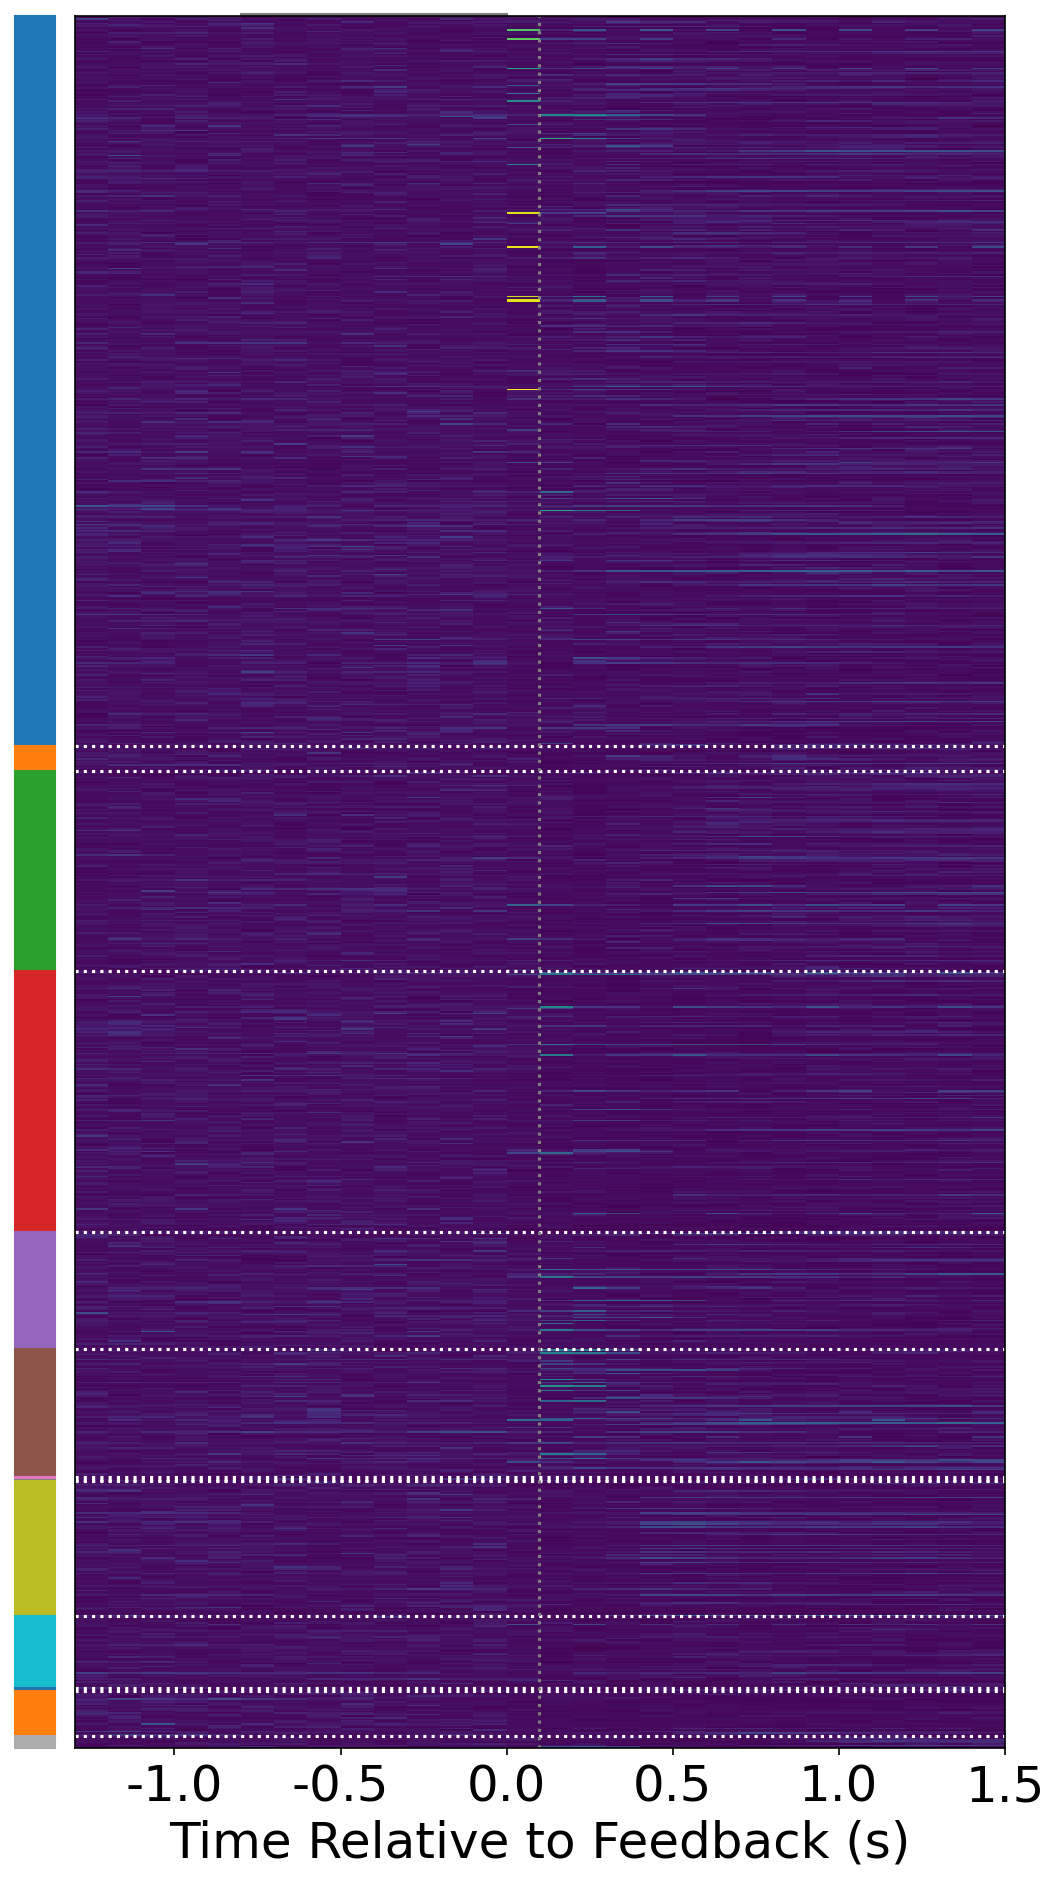

In [14]:
models = np.load(os.path.join(OUTPUT_DIR, f"feedback_models.npy"), allow_pickle=True)

# evaluate weights by time. Pass in number of neurons and number of classes
weights = classifier_utils.evaluate_model_weights_by_time_bins(models, num_neurons=1117, num_classes=2)

# normalize weights so that they sum to 1
sums = np.sum(weights, axis=0)
normalized = weights / sums
matplotlib.rcParams.update({'font.size': 24})
fig, ax = plt.subplots(figsize=(8, 15), dpi=150)
visualization_utils.visualize_weights(positions, normalized, "manual_structure", ax=ax)